# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class.
To test what you learned in the class, we will hold a competition. You will create a classifier that predicts how the level of some text in French (A1,..., C2). The team with the highest rank will get some goodies in the last class (some souvenirs from tech companies: Amazon, LinkedIn, etc).

**2 people per team**

Choose a team here:
https://moodle.unil.ch/mod/choicegroup/view.php?id=1305831


#### 1. 📂 Create a public GitHub repository for your team using this naming convention `DMML2022_[your_team_name]` with the following structure:
- data (folder)
- code (folder)
- documentation (folder)
- a readme file (.md): *mention team name, participants, brief description of the project, approach, summary of results table and link to the explainatory video (see below).*

All team members should contribute to the GitHub repository.

#### 2. 🇰 Join the competititon on Kaggle using the invitation link we sent on Slack.

Under the Team tab, save your team name (`UNIL_your_team_name`) and make sure your team members join in as well. You can merge your user account with your teammates in order to create a team.

#### 3. 📓 Read the data into your colab notebook. There should be one code notebook per team, but all team members can participate and contribute code.

You can use either direct the Kaggle API and your Kaggle credentials (as explained below and **entirely optional**), or dowload the data form Kaggle and upload it onto your team's GitHub repository under the data subfolder.

#### 4. 💎 Train your models and upload the code under your team's GitHub repo. Set the `random_state=0`.
- baseline
- logistic regression with TFidf vectoriser (simple, no data cleaning)
- KNN & hyperparameter optimisation (simple, no data cleaning)
- Decision Tree classifier & hyperparameter optimisation (simple, no data cleaning)
- Random Forests classifier (simple, no data cleaning)
- another technique or combination of techniques of your choice

BE CREATIVE! You can use whatever method you want, in order to climb the leaderboard. The only rule is that it must be your own work. Given that, you can use all the online resources you want.

#### 5. 🎥 Create a YouTube video (10-15 minutes) of your solution and embed it in your notebook. Explain the algorithms used and the evaluation of your solutions. *Select* projects will also be presented live by the group during the last class.


### Submission details (one per team)

1. Download a ZIPped file of your team's repository and submit it in Moodle here. IMPORTANT: in the comment of the submission, insert a link to the repository on Github.
https://moodle.unil.ch/mod/assign/view.php?id=1305833



### Grading (one per team)
- 20% Kaggle Rank
- 50% code quality (using classes, splitting into proper files, documentation, etc)
- 15% github quality (include link to video, table with progress over time, organization of code, images, etc)
- 15% video quality (good sound, good slides, interesting presentation).


## Some further details for points 3 and 4 above.


In [19]:
# read in your training data
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import spacy
from spacy import displacy
from sklearn.model_selection import GridSearchCV


def evaluate(true, pred):
    precision = precision_score(true, pred, average='micro')
    recall = recall_score(true, pred, average='micro')
    f1 = f1_score(true, pred, average='micro')
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")


df = pd.read_csv('../data/training_data.csv')
X = df['sentence']
y = df.difficulty

# --Unlabeled--
df_unlabelled_test_data = pd.read_csv("../data/unlabelled_test_data.csv")

#sample
df_sample = pd.read_csv("../data/sample_submission.csv")

In [3]:
df_unlabelled_test_data

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."
...,...,...
1195,1195,C'est un phénomène qui trouve une accélération...
1196,1196,Je vais parler au serveur et voir si on peut d...
1197,1197,Il n'était pas comme tant de gens qui par pare...
1198,1198,Ils deviennent dangereux pour notre économie.


In [4]:
y.head()

0    C1
1    A1
2    A1
3    A1
4    B1
Name: difficulty, dtype: object

Have a look at the data on which to make predictions.

In [5]:
df_pred = pd.read_csv('../data/unlabelled_test_data.csv')
df_pred.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


And this is the format for your submissions.

In [6]:
df_example_submission = pd.read_csv('../data/sample_submission.csv')
df_example_submission.head()

,id,difficulty
0,0,A1
1,1,A1
2,2,A1
3,3,A1
4,4,A1


### 4. Train your models

Set your X and y variables.
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.



In [7]:
np.random.seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 4.1.Baseline
What is the baseline for this classification problem?

In [8]:
y_train.value_counts(normalize=True)

A1    0.169792
C2    0.169010
B2    0.168750
B1    0.165365
A2    0.164323
C1    0.162760
Name: difficulty, dtype: float64

#### 4.2. Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [9]:
vect = TfidfVectorizer()
lr = LogisticRegression()

pipe = Pipeline([('vect', vect), ('lr', lr)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('lr', LogisticRegression())])

Calculate accuracy, precision, recall and F1 score on the test set.

In [10]:
pred = pipe.predict(X_test)

evaluate(y_test, pred)
#Thus in binary classification, the count of true negatives is C00, false negatives is C10, true positives is C11 and false positives is C01 .

CONFUSION MATRIX:
[[93 31 21 10  4  2]
 [54 60 30  6  6  8]
 [12 38 64 17  9 20]
 [ 6  6 15 66 27 24]
 [ 4  4 10 37 73 45]
 [ 7  8  8 19 24 92]]
ACCURACY SCORE:
0.4667
CLASSIFICATION REPORT:
	Precision: 0.4667
	Recall: 0.4667
	F1_Score: 0.4667


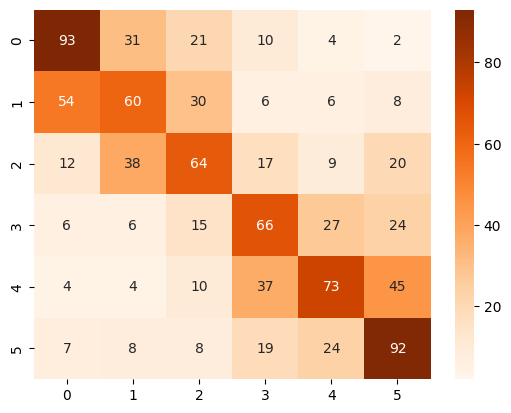

In [11]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred)), annot=True, cmap='Oranges', fmt='.4g');

#add title, labels, ...

Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

In [12]:
a=X_test.iloc[7]
b=y_test.iloc[7]
#c=pipe.predict(a)
print(a)
print(b)
#print(c)

Vous eussiez juré que les gens la voyaient, l'entendaient rouler pesamment devant eux, retentissante de tous les trésors enfermés dans ses flancs.
C1


Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

In [13]:
df_sample

,id,difficulty
0,0,A1
1,1,A1
2,2,A1
3,3,A1
4,4,A1
...,...,...
1195,1195,A1
1196,1196,A1
1197,1197,A1
1198,1198,A1


In [17]:
col_id = pd.DataFrame(df_unlabelled_test_data.id)

col_id
prediction = pipe.predict(df_unlabelled_test_data.sentence)
df_lr = pd.DataFrame(prediction, columns=["difficulty"])
df_lr['id'] = col_id.id
df_lr = df_lr.iloc[:,[1,0]]



In [18]:
df_lr


,id,difficulty
0,0,C2
1,1,A2
2,2,A1
3,3,A1
4,4,C2
...,...,...
1195,1195,C2
1196,1196,A2
1197,1197,C2
1198,1198,C1


#### 4.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [21]:
knn = KNeighborsClassifier()

pipe = Pipeline([('vect', vect), ('knn', knn)])
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

evaluate(y_test, pred)


CONFUSION MATRIX:
[[122  28   8   1   1   1]
 [ 98  51  12   1   1   1]
 [ 81  39  33   3   1   3]
 [ 49  30  19  29   3  14]
 [ 48  36  29  15  29  16]
 [ 37  29  17  23   9  43]]
ACCURACY SCORE:
0.3198
CLASSIFICATION REPORT:
	Precision: 0.3198
	Recall: 0.3198
	F1_Score: 0.3198


Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, p=2, weights='uniform')

pipe = Pipeline([('vect', vect), ('knn', knn)])
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

evaluate(y_test, pred)


In [23]:
# Define parameters to test
grid = {'n_neighbors':np.arange(1,15),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

# Define and fit model
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=10)
knn_cv.fit(X_train, y_train)

# Print results
print("Hyperparameters:", knn_cv.best_params_)
print("Train Score:", round(knn_cv.best_score_, 4))
print("Test Score:", round(knn_cv.score(X_test, y_test), 4))

ValueError: 
All the 560 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
56 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\sklearn\neighbors\_base.py", line 454, in _fit
    X, y = self._validate_data(
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\sklearn\base.py", line 554, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\sklearn\utils\validation.py", line 1104, in check_X_y
    X = check_array(
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\sklearn\utils\validation.py", line 877, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\pandas\core\series.py", line 893, in __array__
    return np.asarray(self._values, dtype)
ValueError: could not convert string to float: 'Il alla parmi les bûcherons qui vivaient à la lisière de la forêt, et mania la lourde cognée .'

--------------------------------------------------------------------------------
504 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\sklearn\neighbors\_base.py", line 454, in _fit
    X, y = self._validate_data(
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\sklearn\base.py", line 554, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\sklearn\utils\validation.py", line 1104, in check_X_y
    X = check_array(
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\sklearn\utils\validation.py", line 877, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\users\moham\onedrive - université de lausanne\master\data mining and machine learning 2022-2023\code\dmml2022_logitech\venv\lib\site-packages\pandas\core\series.py", line 893, in __array__
    return np.asarray(self._values, dtype)
ValueError: could not convert string to float: "Comment t'appelles-tu ?"


#### 4.4. Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
# your code here

Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [ ]:
# your code here

#### 4.5. Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
# your code here

#### 4.6. Any other technique, including data cleaning if necessary

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

In [ ]:
# your code here

#### 4.7. Show a summary of your results